In [ ]:
import librosa
import scipy.signal


# === Load audio
base_sti_dir = '../SMN4Lang_data/ds004078/stimuli'
audio_path = f'{base_sti_dir}/audio/story_{story_id}.wav'
y, sr = librosa.load(audio_path, sr=None)

# === Extract envelope
analytic_signal = scipy.signal.hilbert(y)
envelope = np.abs(analytic_signal)

# === Resample envelope to match MEG sfreq
from scipy.signal import resample

n_samples_meg = raw.n_times
envelope_resampled = resample(envelope, n_samples_meg)

# === Plot envelope
plt.figure(figsize=(12,3))
plt.plot(envelope_resampled)
plt.title('Resampled Acoustic Envelope')
plt.xlabel('MEG sample')
plt.show();


In [4]:
#calculate TRF coef
import numpy as np
import mne
import scipy.io as sio
import os
import librosa
import scipy.signal
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from scipy.signal import resample


# === Setup ===
base_raw_dir = '../SMN4Lang_data/ds004078/derivatives/preprocessed_data/sub-01/MEG'
base_sti_dir = '../SMN4Lang_data/ds004078/stimuli'
save_dir = 'acousticEnvTRF'

# Create save dir if not exist
os.makedirs(save_dir, exist_ok=True)

# === Loop over story 1~60 ===
for story_id in range(7, 13):

    print(f'=== Processing Story {story_id} ===')

    # === File paths ===
    rawpath = f'{base_raw_dir}/sub-01_task-RDR_run-{story_id}_meg.fif'
    audio_path = f'{base_sti_dir}/audio/story_{story_id}.wav'

    # === Load data ===
    raw = mne.io.read_raw_fif(rawpath, preload=True)

    # === Load audio
    y, sr = librosa.load(audio_path, sr=None)

    # === Extract envelope
    analytic_signal = scipy.signal.hilbert(y)
    envelope = np.abs(analytic_signal)

    # === Resample envelope to match MEG time axis
    sfreq = raw.info['sfreq']
    n_samples_meg = raw.n_times
    resampled_envelope = resample(envelope, n_samples_meg)

    # === Build regressor ===
    regressor = resampled_envelope

    # === Build lagged matrix ===
    scaler = StandardScaler()
    regressor_z = scaler.fit_transform(regressor.reshape(-1, 1)).squeeze()

    tmin = -0.1
    tmax = 0.5
    lags = np.arange(int(tmin * sfreq), int(tmax * sfreq) + 1)

    X = np.stack([np.roll(regressor_z, lag) for lag in lags], axis=-1)

    valid_start = lags.max()
    valid_end = len(regressor_z) + lags.min()

    X_valid = X[valid_start:valid_end]

    # === MEG data ===
    picks = mne.pick_types(raw.info, meg=True)
    meg_data = raw.get_data(picks=picks)
    Y_valid = meg_data[:, valid_start:valid_end].T  # (samples, channels)

    # === Fit Ridge ===
    ridge = Ridge(alpha=1.0)
    coefs = []
    for ch in range(Y_valid.shape[1]):
        ridge.fit(X_valid, Y_valid[:, ch])
        coefs.append(ridge.coef_)

    coefs = np.stack(coefs)
    lag_times = lags / sfreq

    # === Build picks + meg_info ===
    picks_grad = mne.pick_types(raw.info, meg='grad')
    picks_mag  = mne.pick_types(raw.info, meg='mag')

    meg_info_grad = mne.pick_info(raw.info, picks_grad)
    meg_info_mag  = mne.pick_info(raw.info, picks_mag)

    # === Save full TRF result ===
    save_path = os.path.join(save_dir, f'sub-01_story{story_id}_acousticEnvTRF_results_full.npz')
    # === Skip if already done ===
    if os.path.exists(save_path):
        print(f'[Story {story_id}] Already exists → skipping.')
        continue

    np.savez(save_path,
             coefs=coefs,
             lags=lag_times,
             picks=picks,
             picks_grad=picks_grad,
             picks_mag=picks_mag)

    # === Save meg_info ===
    mne.io.write_info(os.path.join(save_dir, f'sub-01_story{story_id}_meg_info_grad.fif'), meg_info_grad)
    mne.io.write_info(os.path.join(save_dir, f'sub-01_story{story_id}_meg_info_mag.fif'), meg_info_mag)

    print(f'[Story {story_id}] Acoustic Env TRF results + picks + meg_info saved.')
    print('------------------------------------------')


ModuleNotFoundError: No module named 'librosa'


=== Plotting Story 1 ===


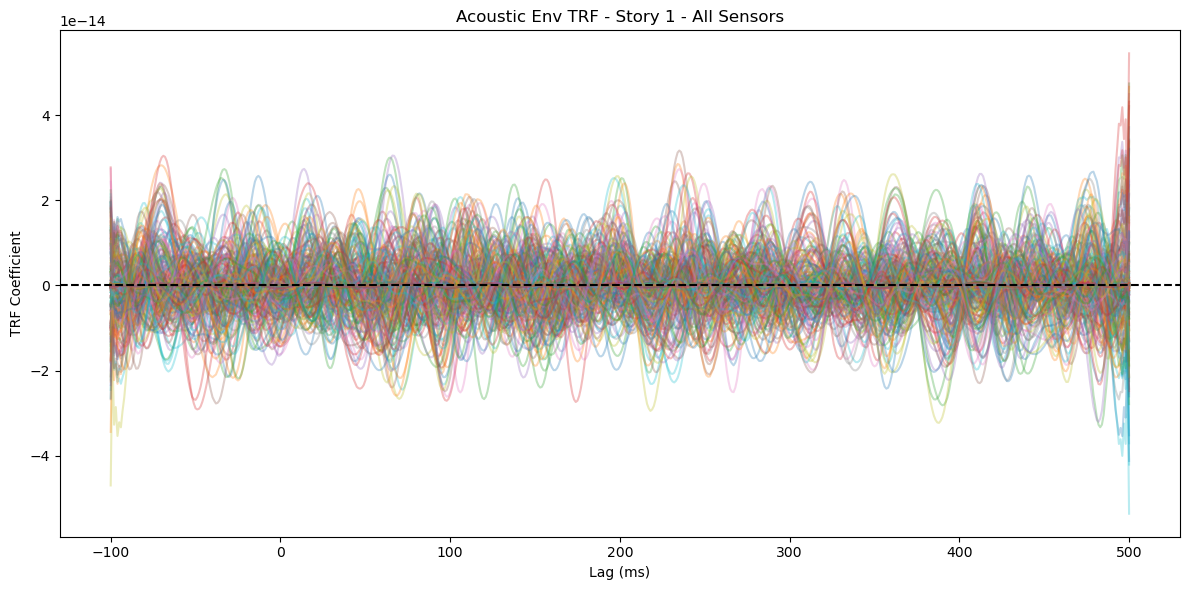

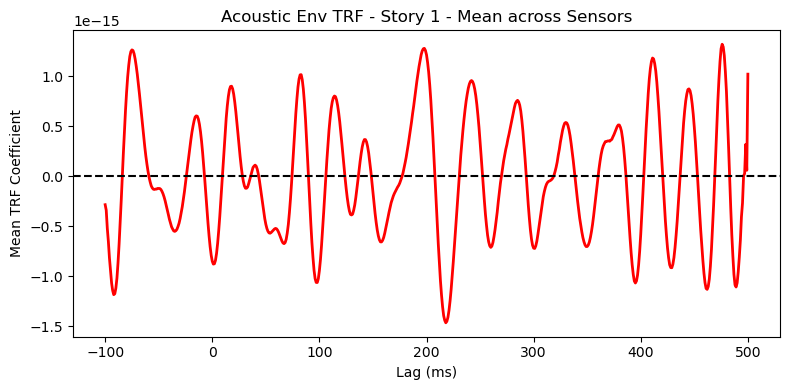

/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:53: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  is_grad = np.in1d(picks, picks_grad)
/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:54: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  is_mag  = np.in1d(picks, picks_mag)
/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


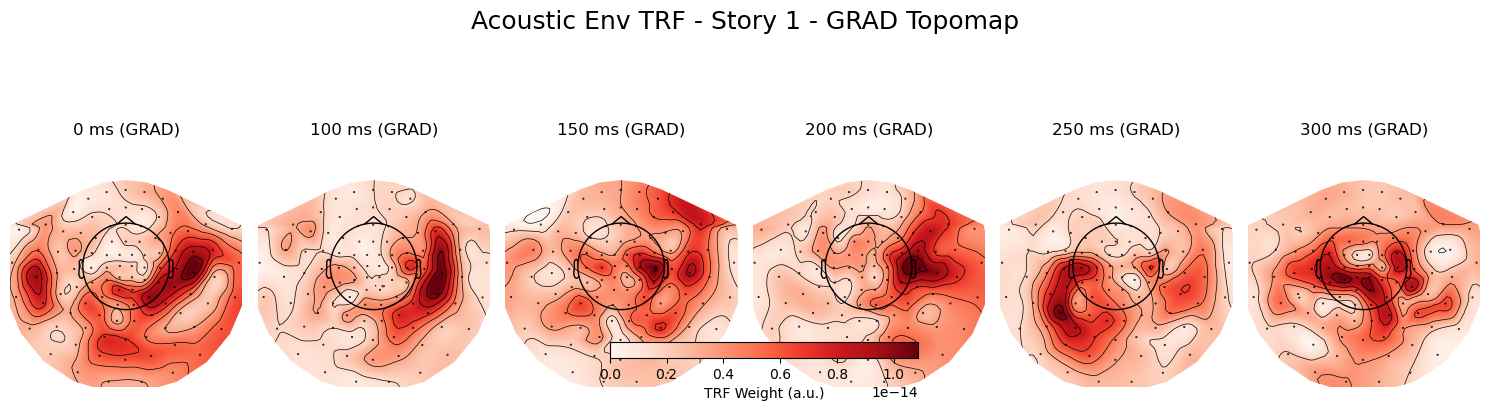

/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


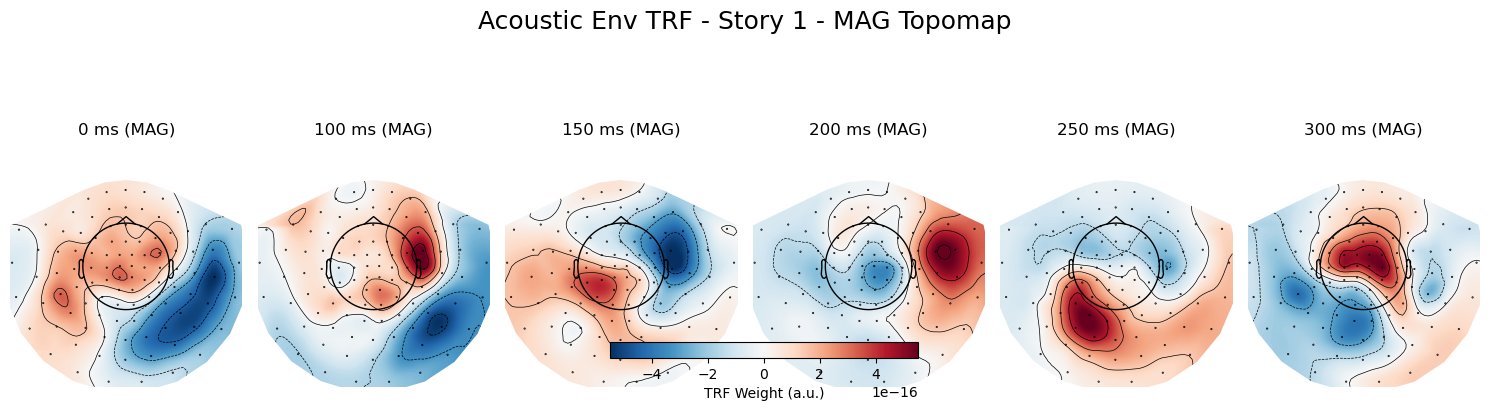


=== Plotting Story 2 ===


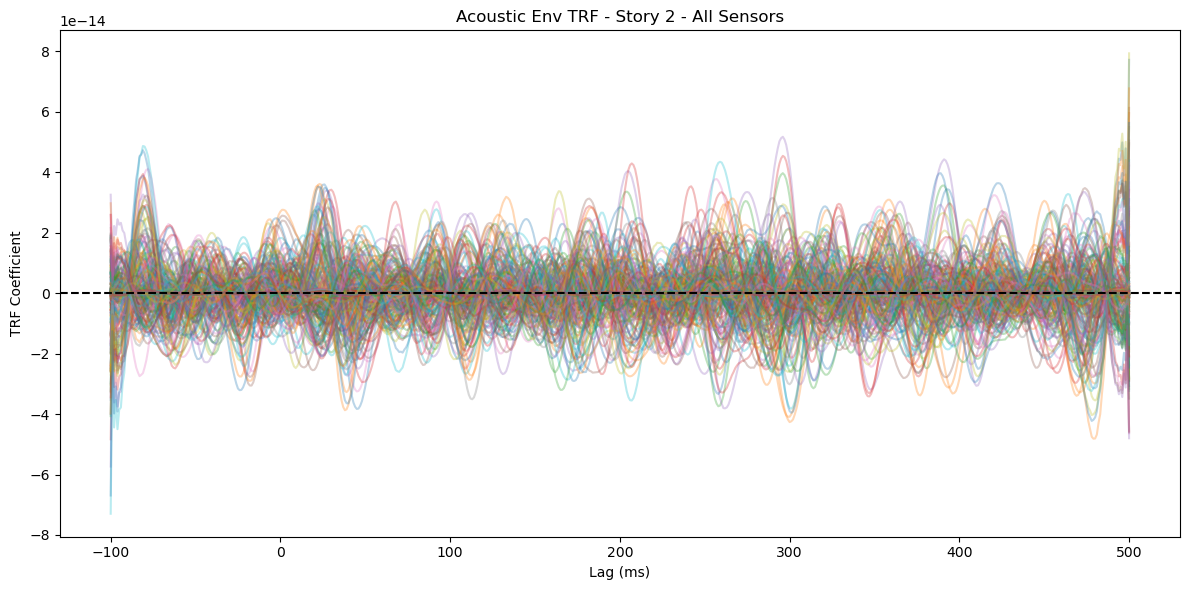

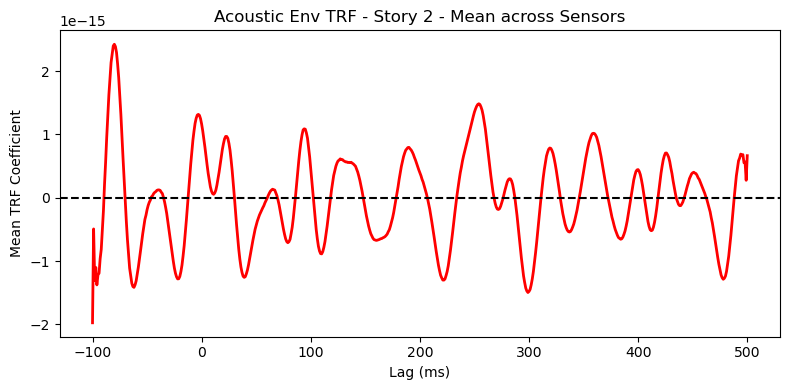

/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:53: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  is_grad = np.in1d(picks, picks_grad)
/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:54: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  is_mag  = np.in1d(picks, picks_mag)
/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


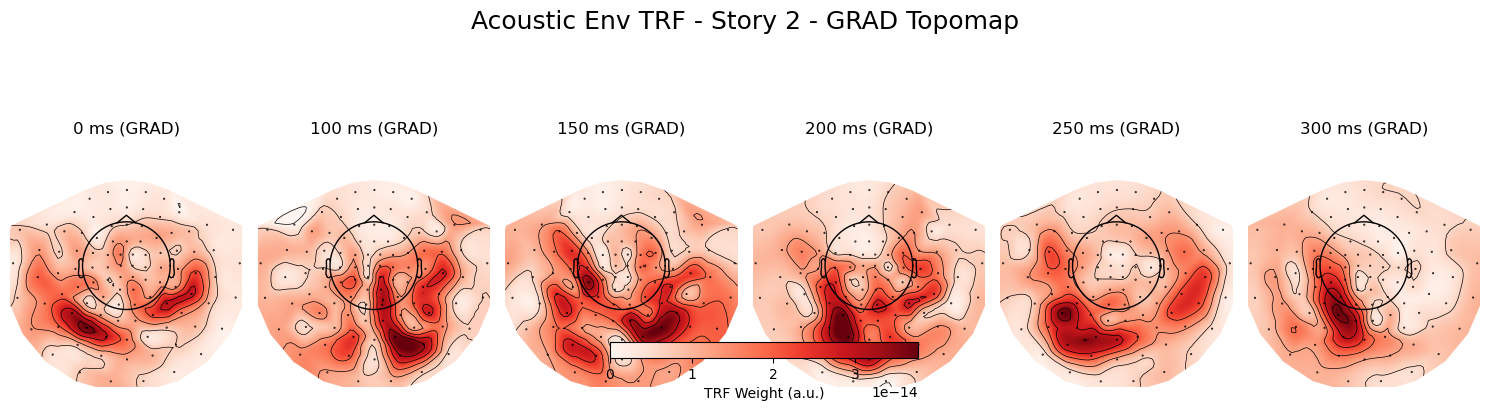

/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


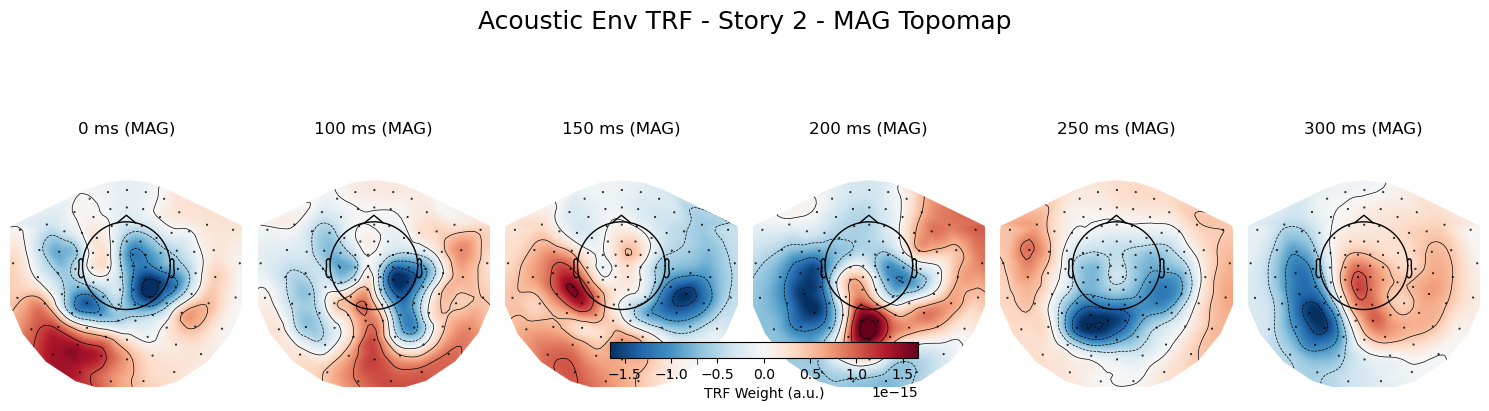


=== Plotting Story 3 ===


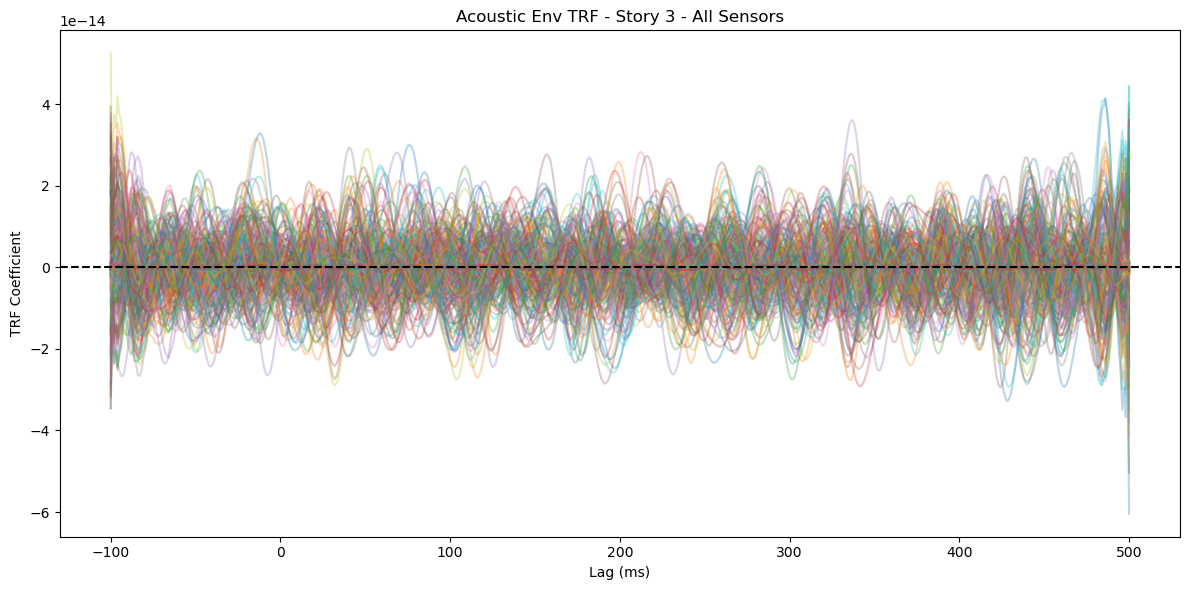

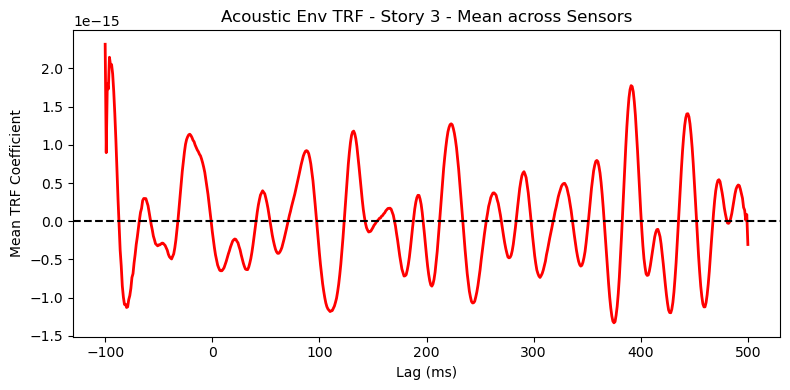

/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:53: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  is_grad = np.in1d(picks, picks_grad)
/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:54: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  is_mag  = np.in1d(picks, picks_mag)
/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


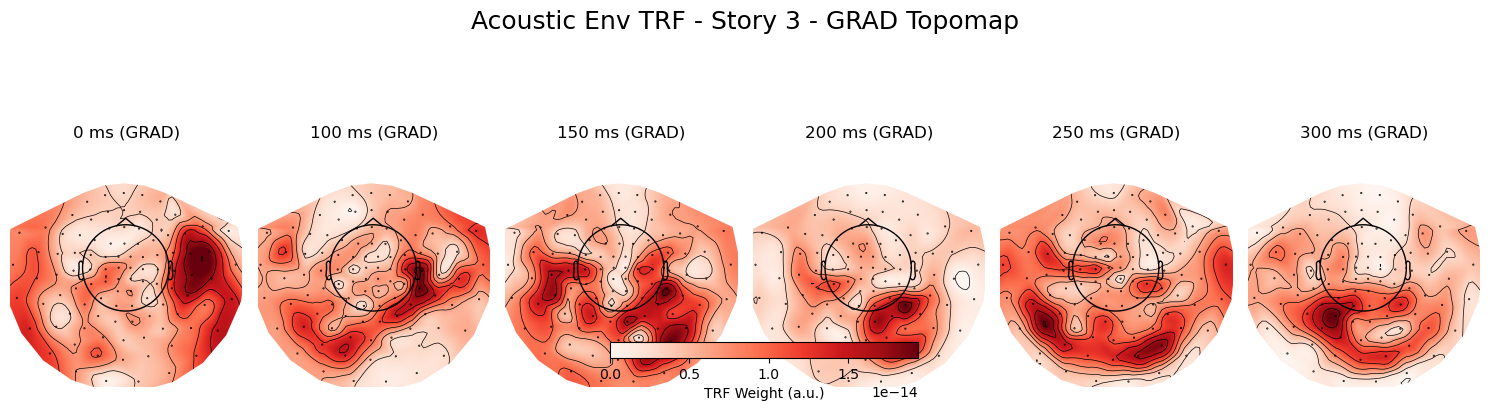

/var/folders/6j/66yjmtx90v99bpxs5plqry080000gp/T/ipykernel_45670/99301357.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


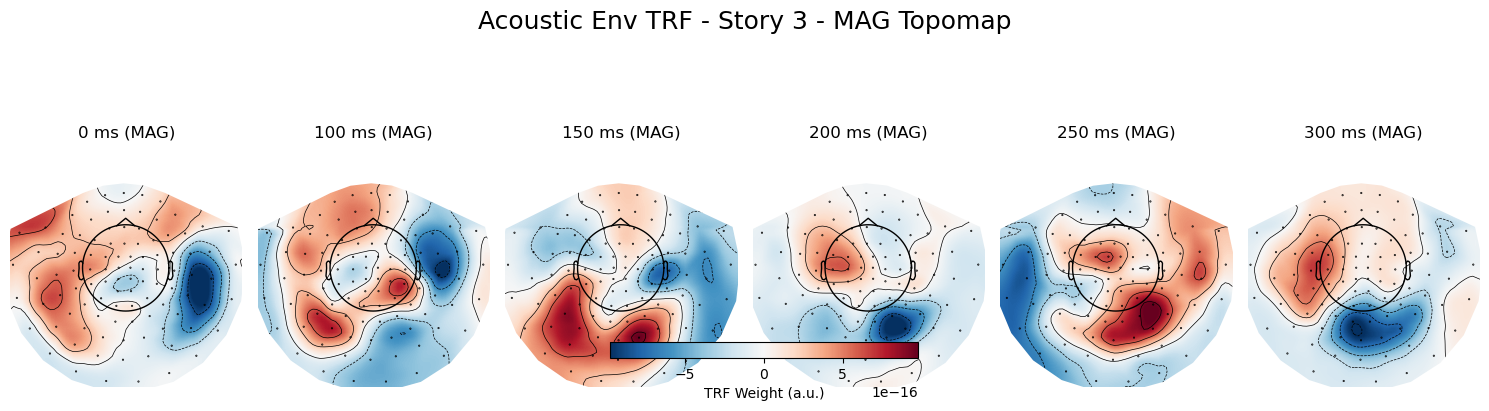

In [5]:
#draw the TRF plot

import numpy as np
import matplotlib.pyplot as plt
import mne
import os

# === Setup ===
base_dir = 'acousticEnvTRF'
story_ids = [1,2,3]  # 你可以選幾個 story 先 plot

# === Loop over stories ===
for story_id in story_ids:
    print(f'\n=== Plotting Story {story_id} ===')

    # === Load TRF npz
    npz_path = os.path.join(base_dir, f'sub-01_story{story_id}_acousticEnvTRF_results_full.npz')
    if not os.path.exists(npz_path):
        print(f'Warning: {npz_path} not found → skipping.')
        continue

    trf_results = np.load(npz_path)
    coefs = trf_results['coefs']
    lags = trf_results['lags'] * 1000  # → convert to ms
    picks = trf_results['picks']
    picks_grad = trf_results['picks_grad']
    picks_mag = trf_results['picks_mag']

    # === 1️⃣ Plot TRF waveforms (all sensors)
    plt.figure(figsize=(12,6))
    for ch_idx in range(coefs.shape[0]):
        plt.plot(lags, coefs[ch_idx], alpha=0.3)
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Lag (ms)')
    plt.ylabel('TRF Coefficient')
    plt.title(f'Acoustic Env TRF - Story {story_id} - All Sensors')
    plt.tight_layout()
    plt.show()

    # === 2️⃣ Plot Mean TRF across sensors → 最常報
    mean_trf = np.mean(coefs, axis=0)
    plt.figure(figsize=(8,4))
    plt.plot(lags, mean_trf, color='red', linewidth=2)
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Lag (ms)')
    plt.ylabel('Mean TRF Coefficient')
    plt.title(f'Acoustic Env TRF - Story {story_id} - Mean across Sensors')
    plt.tight_layout()
    plt.show()

    # === 3️⃣ Plot Topomap at key lags → e.g. 100ms / 150ms / 200ms
    meg_info_grad = mne.io.read_info(os.path.join(base_dir, f'sub-01_story{story_id}_meg_info_grad.fif'))
    meg_info_mag  = mne.io.read_info(os.path.join(base_dir, f'sub-01_story{story_id}_meg_info_mag.fif'))

    is_grad = np.in1d(picks, picks_grad)
    is_mag  = np.in1d(picks, picks_mag)

    # === Choose target lags
    target_lags_ms = [0, 100, 150, 200, 250, 300]
    target_lag_idxs = [np.argmin(np.abs(lags - lag_ms)) for lag_ms in target_lags_ms]

    # === Plot GRAD topomap
    fig_grad, axes_grad = plt.subplots(1, len(target_lags_ms), figsize=(15, 4))
    for i, idx in enumerate(target_lag_idxs):
        weights_grad = coefs[is_grad, idx]
        im_grad, cn_grad = mne.viz.plot_topomap(weights_grad, meg_info_grad, axes=axes_grad[i], show=False)
        axes_grad[i].set_title(f'{target_lags_ms[i]} ms (GRAD)')
    fig_grad.colorbar(im_grad, ax=axes_grad, orientation='horizontal', fraction=0.05, pad=0.1, label='TRF Weight (a.u.)')
    fig_grad.suptitle(f'Acoustic Env TRF - Story {story_id} - GRAD Topomap', fontsize=18)
    plt.tight_layout()
    plt.show()

    # === Plot MAG topomap
    fig_mag, axes_mag = plt.subplots(1, len(target_lags_ms), figsize=(15, 4))
    for i, idx in enumerate(target_lag_idxs):
        weights_mag = coefs[is_mag, idx]
        im_mag, cn_mag = mne.viz.plot_topomap(weights_mag, meg_info_mag, axes=axes_mag[i], show=False)
        axes_mag[i].set_title(f'{target_lags_ms[i]} ms (MAG)')
    fig_mag.colorbar(im_mag, ax=axes_mag, orientation='horizontal', fraction=0.05, pad=0.1, label='TRF Weight (a.u.)')
    fig_mag.suptitle(f'Acoustic Env TRF - Story {story_id} - MAG Topomap', fontsize=18)
    plt.tight_layout()
    plt.show()
